<a href="https://colab.research.google.com/github/mrromaniuc/quantum-computing/blob/main/IBMCertifiedAssociateDeveloperQiskit/09.3-Plot_a_Bloch_Multivector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install qiskit
!pip install qiskit-aer
!pip install qiskit-visualization
!pip install qiskit-ibm-provider
!pip install imgaug==0.2.5
!pip install pylatexenc

In [2]:
#Setting configuration to use matplotlib in drawings
!mkdir ~/.qiskit
!echo "[default]" > ~/.qiskit/settings.conf
!echo "circuit_drawer = mpl" >> ~/.qiskit/settings.conf
!more ~/.qiskit/settings.conf


#
# Loading IBM credentials
#
API_TOKEN_DIR="/content/drive/'My Drive'/'Colab Notebooks'/QC"
API_TOKEN_FILE="MY_API_TOKEN.txt"

#Mount the google drive first
from google.colab import drive
drive.mount('/content/drive')
#%cd /content/drive/'My Drive'/'Colab Notebooks'/QC
%cd $API_TOKEN_DIR

#Read the MY_API_TOKEN from file...
from qiskit_ibm_provider import IBMProvider
MY_API_TOKEN = ""
with open(API_TOKEN_FILE) as f:
  MY_API_TOKEN=f.readline()
IBMProvider.save_account(MY_API_TOKEN, overwrite=True)

[default]
circuit_drawer = mpl
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/QC


References:
* https://qiskit.org/documentation/stubs/qiskit.visualization.plot_bloch_multivector.html
* https://qiskit.org/documentation/tutorials/circuits/2_plotting_data_in_qiskit.html

## Plot a bloch multivector


### Based on a Density Matrix

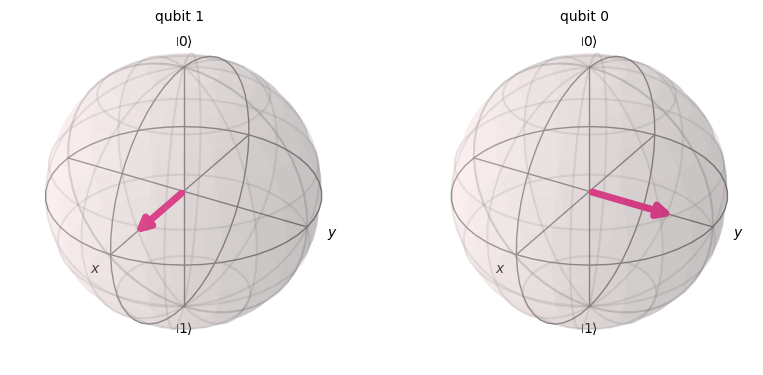

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_bloch_multivector

qc = QuantumCircuit(2)
qc.h([0,1])
qc.t(1)
qc.s(0)
qc.cx(0,1)

dm = DensityMatrix(qc)
plot_bloch_multivector(dm, reverse_bits=True)

### Based on a given array

#### When array is $\frac{1}{\sqrt{2}}$*[1,1,0,0] = $\frac{1}{\sqrt{2}}$* [ |00> + |01> ]
Note from right to left, first qubit is 0 or 1 (50%) and second is ALWAYS 0.  

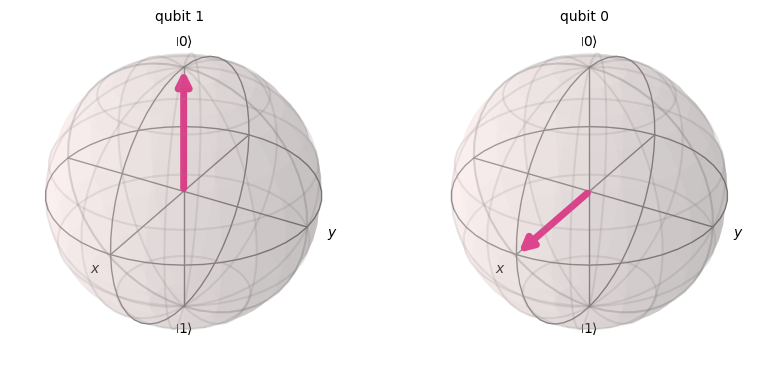

In [10]:
import numpy as np
from qiskit.visualization import plot_bloch_multivector

vector = 1/np.sqrt(2)*np.array([1, 1, 0, 0])

plot_bloch_multivector(vector, reverse_bits=True)

#### When array is $\frac{1}{\sqrt{2}}$*[1,0,1,0] = $\frac{1}{\sqrt{2}}$* [ |00> + |10> ]
Note from right to left, first qubit is ALWAYS 0, second can be 0 or 1 with 50% probability.  

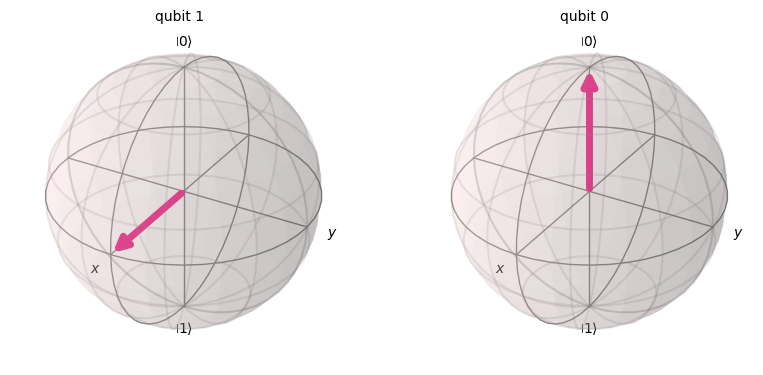

In [12]:
import numpy as np
from qiskit.visualization import plot_bloch_multivector

vector = 1/np.sqrt(2)*np.array([1, 0, 1, 0])

plot_bloch_multivector(vector, reverse_bits=True)

#### When array is $\frac{1}{\sqrt{2}}$*[1,0,0,1] = $\frac{1}{\sqrt{2}}$* [ |00> + |11> ]
Note in this situation we have entanglement - cannot be represented by the bloch sphere

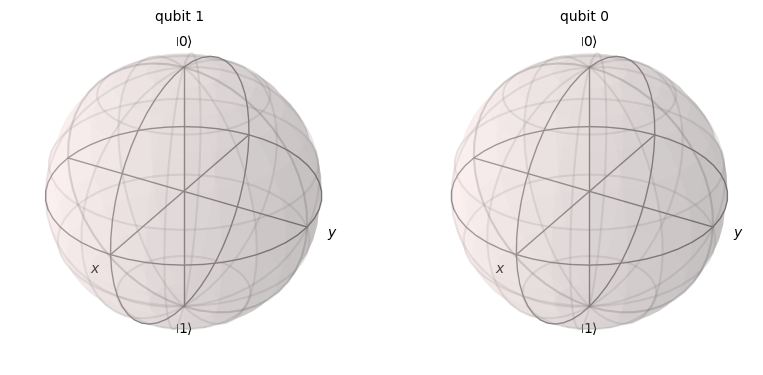

In [13]:
import numpy as np
from qiskit.visualization import plot_bloch_multivector

vector = 1/np.sqrt(2)*np.array([1, 0, 0, 1])

plot_bloch_multivector(vector, reverse_bits=True)

#### When array is $\frac{1}{\sqrt{2}}$*[0,1,0,1] = $\frac{1}{\sqrt{2}}$* [ |01> + |11> ]
Note from right to left, first qubit is ALWAYS 1, second can be 0 or 1 with 50% probability.  

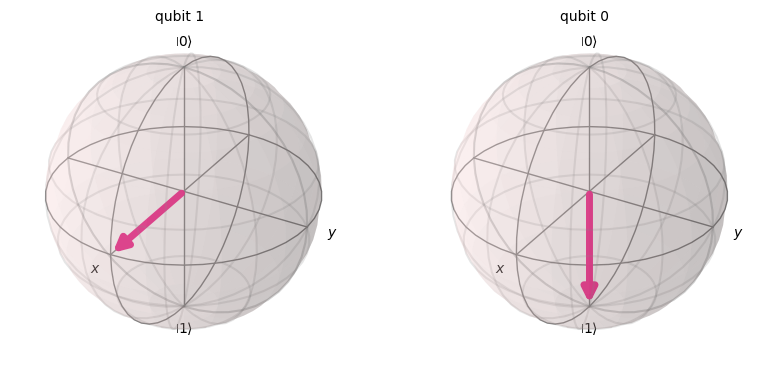

In [14]:
import numpy as np
from qiskit.visualization import plot_bloch_multivector

vector = 1/np.sqrt(2)*np.array([0, 1, 0, 1])

plot_bloch_multivector(vector, reverse_bits=True)

#### When array is $\frac{1}{\sqrt{2}}$*[0,1,0,-1] = $\frac{1}{\sqrt{2}}$* [ |01> - |11> ]
Slightly diferent example, now we have a local phase between the qubits. Still, from right to left, first qubit is ALWAYS 1, second can be 0 or 1 with 50% probability and a phase.  

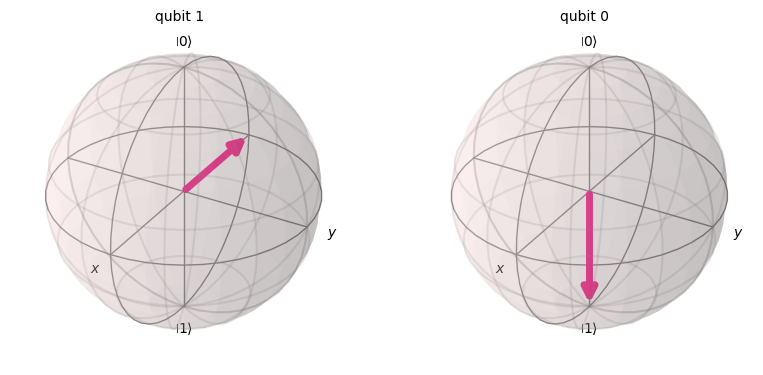

In [15]:
import numpy as np
from qiskit.visualization import plot_bloch_multivector

vector = 1/np.sqrt(2)*np.array([0, 1, 0, -1])

plot_bloch_multivector(vector, reverse_bits=True)

In [3]:
import qiskit.tools.jupyter
%qiskit_version_table